# Logistic Regression Modeling

## Import packages and modules

In [15]:
import csv
import numpy as np
import pandas as pd

import seaborn as sns
from matplotlib import pyplot as plt

from imblearn.under_sampling import RandomUnderSampler 

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDClassifier

## Import data

In [8]:
%run /Users/apassan/Documents/03_Professional/07_GitHubRepo/APassan_Portfolio/Classification_CreditCardFraud/scripts/model_prep.py

### Confirm X and Y Shapes

In [9]:
# Print the shapes to ensure the matrix dimensions line up
print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)
print('X_test shape:', X_test.shape)
print('Y_test shape:', Y_test.shape)


X_train shape: (139844, 7)
Y_train shape: (139844,)
X_test shape: (34962, 7)
Y_test shape: (34962,)


## Modeling - Logistic Regression

First we will create a base logistic regression model

In [13]:
# Base Logistic Regression Model 
logreg_base = LogisticRegression(random_state=1)

#Fit
logreg_base.fit(X_train, Y_train)

Y_pred=logreg_base.predict(X_test) 

Y_pred 

print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred)) 

Accuracy: 0.9415079228877067


Now we will implement Grid Search and K-10 cross validation to get the best logistic regression model.

In [16]:

# Find the best best penalty and C value 
logreg_gscv = LogisticRegression( random_state=1)

param_grid = { 'penalty': ['none', 'l1', 'l2', 'elastic_net'], 'C': [0.05, 0.1, 0.5, 1, 5] }

grid_search = GridSearchCV(logreg_gscv, param_grid=param_grid)

grid_search.fit(X_train, Y_train)

result = grid_search.cv_results_
estimator = grid_search.best_estimator_
score = grid_search.best_score_
params = grid_search.best_params_


print('best score', score)
print('best params', params)

/Users/apassan/miniforge3/envs/tf/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/apassan/miniforge3/envs/tf/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/apassan/miniforge3/envs/tf/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/apassan/miniforge3/envs/tf/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/apassan/miniforge3/envs/tf/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/apassan/

best score 0.9402334000077562
best params {'C': 0.05, 'penalty': 'none'}


In [23]:
# Final Logistirc Regression Model
logreg_fin=LogisticRegression(C=0.05,penalty="none")
logreg_fin.fit(X_train,Y_train)

Y_pred_fin=logreg_fin.predict(X_test) 

Y_pred_fin

print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred_fin)) 
print("Precision:", metrics.precision_score(Y_test, Y_pred_fin))

/Users/apassan/miniforge3/envs/tf/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


Accuracy: 0.9415365253704021
Precision: 0.9331632653061225


Text(33.0, 0.5, 'Truth')

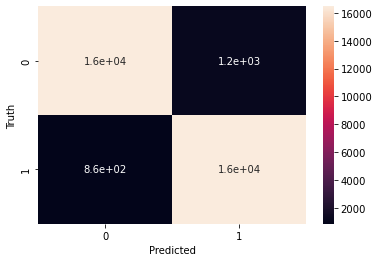

In [20]:
cm = confusion_matrix(Y_test, Y_pred_fin)
sns.heatmap(cm, annot = True)
plt.xlabel("Predicted")
plt.ylabel("Truth")
